**Music Recommendation**

**DATASET LINK :- https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data **

**ALGORITHM USED :- Random Forest Classification**

Importing Libraries.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

Importing Datasets and preprocessing of Data.

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
df.shape

(15564, 6)

In [ ]:
df = df.sample(frac=0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 11212 to 4133
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                1556 non-null   object 
 1   song_id             1556 non-null   object 
 2   source_system_tab   1553 non-null   object 
 3   source_screen_name  1540 non-null   object 
 4   source_type         1553 non-null   object 
 5   target              1556 non-null   float64
dtypes: float64(1), object(5)
memory usage: 85.1+ KB


In [ ]:
songs = pd.read_csv('/content/songs.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31674 entries, 0 to 31673
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      31674 non-null  object 
 1   song_length  31674 non-null  int64  
 2   genre_ids    31142 non-null  object 
 3   artist_name  31674 non-null  object 
 4   composer     18444 non-null  object 
 5   lyricist     8854 non-null   object 
 6   language     31673 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [ ]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                1556 non-null   object 
 1   song_id             1556 non-null   object 
 2   source_system_tab   1553 non-null   object 
 3   source_screen_name  1540 non-null   object 
 4   source_type         1553 non-null   object 
 5   target              1556 non-null   float64
 6   song_length         197 non-null    float64
 7   genre_ids           194 non-null    object 
 8   artist_name         197 non-null    object 
 9   composer            164 non-null    object 
 10  lyricist            124 non-null    object 
 11  language            197 non-null    float64
dtypes: float64(3), object(9)
memory usage: 158.0+ KB


In [ ]:
members = pd.read_csv('members.csv')

In [ ]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    1556 non-null   object 
 1   song_id                 1556 non-null   object 
 2   source_system_tab       1553 non-null   object 
 3   source_screen_name      1540 non-null   object 
 4   source_type             1553 non-null   object 
 5   target                  1556 non-null   float64
 6   song_length             197 non-null    float64
 7   genre_ids               194 non-null    object 
 8   artist_name             197 non-null    object 
 9   composer                164 non-null    object 
 10  lyricist                124 non-null    object 
 11  language                197 non-null    float64
 12  city                    1556 non-null   int64  
 13  bd                      1556 non-null   int64  
 14  gender                  920 non-null    

Replace NA

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    1556 non-null   object 
 1   song_id                 1556 non-null   object 
 2   source_system_tab       1556 non-null   object 
 3   source_screen_name      1556 non-null   object 
 4   source_type             1556 non-null   object 
 5   target                  1556 non-null   float64
 6   song_length             1556 non-null   float64
 7   genre_ids               1556 non-null   object 
 8   artist_name             1556 non-null   object 
 9   composer                1556 non-null   object 
 10  lyricist                1556 non-null   object 
 11  language                1556 non-null   float64
 12  city                    1556 non-null   int64  
 13  bd                      1556 non-null   int64  
 14  gender                  1556 non-null   

Create dates

In [ ]:
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [ ]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.029360,-0.004837,0.039080,-0.037712,0.018041,-0.002079,-0.002497,0.010980,-0.024288,...,-0.037901,-0.009414,-0.006448,0.025573,-0.025834,0.087906,0.008393,0.048118,-0.048327,0.040780
song_id,-0.029360,1.000000,-0.027667,-0.001432,-0.014978,0.013217,0.019871,-0.011585,0.004980,-0.021498,...,-0.068965,0.002024,-0.023333,0.025454,-0.016031,0.007618,0.007930,0.045946,-0.038278,-0.003455
source_system_tab,-0.004837,-0.027667,1.000000,-0.001903,-0.198355,0.122089,0.039765,-0.027405,-0.000094,-0.030508,...,0.019226,0.013230,-0.053235,0.005117,-0.040713,-0.041680,-0.007765,0.023117,-0.026839,0.016544
source_screen_name,0.039080,-0.001432,-0.001903,1.000000,0.176396,-0.088597,0.033045,-0.014271,0.013356,-0.031957,...,-0.023786,0.014723,0.009184,0.022949,-0.004910,0.069377,0.022461,-0.020553,0.034676,0.042159
source_type,-0.037712,-0.014978,-0.198355,0.176396,1.000000,-0.146435,-0.036643,0.044598,-0.025888,0.001909,...,-0.036955,0.021672,-0.008840,0.003045,-0.019908,0.076485,0.021521,-0.037592,0.069958,-0.047221
target,0.018041,0.013217,0.122089,-0.088597,-0.146435,1.000000,0.017345,-0.017319,0.016379,-0.027659,...,-0.017017,-0.001267,-0.022223,0.080507,-0.021354,-0.017983,0.011721,0.051879,0.041173,0.031038
song_length,-0.002079,0.019871,0.039765,0.033045,-0.036643,0.017345,1.000000,-0.885892,0.326935,0.017115,...,0.005651,0.001790,-0.007093,0.015923,-0.013651,-0.005370,-0.006641,0.021859,-0.027832,0.028188
genre_ids,-0.002497,-0.011585,-0.027405,-0.014271,0.044598,-0.017319,-0.885892,1.000000,-0.128268,0.081180,...,-0.017804,-0.010004,0.006125,-0.011054,0.009697,0.011358,0.004332,-0.017914,0.023982,-0.033192
artist_name,0.010980,0.004980,-0.000094,0.013356,-0.025888,0.016379,0.326935,-0.128268,1.000000,0.473543,...,0.042302,0.022621,0.013417,0.004776,0.008477,0.012825,0.038900,-0.020088,0.042412,-0.009401
composer,-0.024288,-0.021498,-0.030508,-0.031957,0.001909,-0.027659,0.017115,0.081180,0.473543,1.000000,...,-0.029589,0.009868,-0.014293,0.008618,-0.007768,-0.045432,0.019310,-0.001026,0.013464,-0.024694


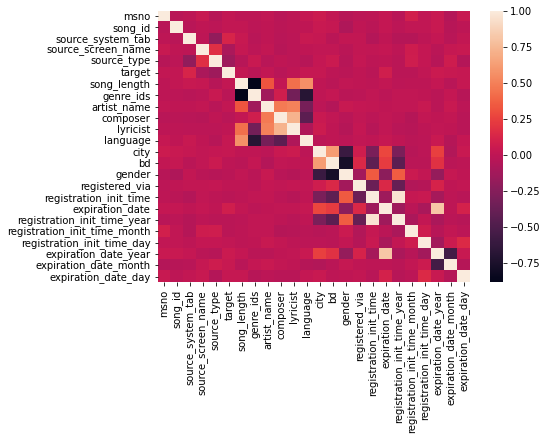

In [ ]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

Random forest model

In [ ]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

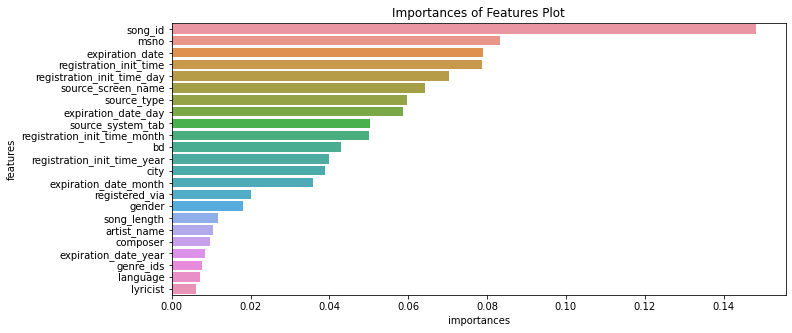

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

array([0.08337725, 0.14828671, 0.05029195, 0.06437749, 0.05960496,
       0.01180791, 0.00777064, 0.01047513, 0.00978788, 0.00606141,
       0.00709034, 0.0387878 , 0.0430524 , 0.01802158, 0.0201458 ,
       0.07879906, 0.07902574, 0.03993146, 0.04996212, 0.07033269,
       0.00851027, 0.03591402, 0.0585854 ])

In [ ]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [ ]:
target = df.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(max_depth=15, min_child_weight=5, n_estimators=250)

In [ ]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

         0.0       0.66      0.45      0.53      9959
         1.0       0.78      0.89      0.83     22033

    accuracy                           0.76     31992
   macro avg       0.72      0.67      0.68     31992
weighted avg       0.74      0.76      0.74     31992



**Conclusion**

By using Random Forest Classifier we get accuracy of music recommendation system as 76%.